# Feature selection, Feature engineering and Model Selection

In [39]:
# Import libiries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn.linear_model as linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV


In [40]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the dataset
# Load the dataset
train_data = pd.read_csv("datasets/train.csv")
test_data = pd.read_csv("datasets/test.csv")

ames_train = pd.read_csv("datasets/ames_train.csv")
kaggle_test = pd.read_csv("datasets/kaggle_test.csv")

In [4]:
# Change display settings to display more rows/columns
pd.options.display.max_rows = ames_train.shape[1]
pd.options.display.max_columns = ames_train.shape[1]

In [5]:
ames_train.shape

(2051, 74)

In [6]:
ames_train.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,60,RL,0.0,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,2010,WD,130500
1,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,4,2009,WD,220000
2,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,1,2010,WD,109000
3,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,4,2010,WD,174000
4,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,3,2010,WD,138500


In [7]:
np.abs(train_data.corr()[['SalePrice']]).sort_values('SalePrice', ascending=False)

,SalePrice
SalePrice,1.000000
Overall Qual,0.800207
Gr Liv Area,0.697038
Garage Area,0.650270
Garage Cars,0.648220
Total Bsmt SF,0.628925
1st Flr SF,0.618486
Year Built,0.571849
Year Remod/Add,0.550370
Full Bath,0.537969


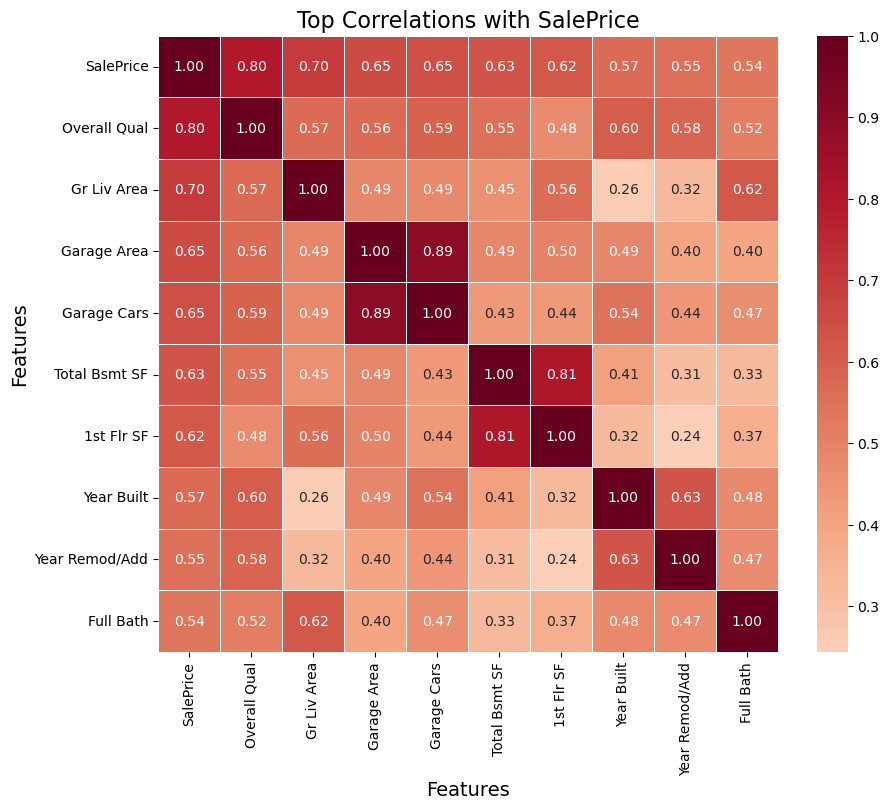

In [8]:
# Create a correlation matrix for SalePrice with the top correlated features
top_corr_features = np.abs(ames_train.corr()['SalePrice']).sort_values(ascending=False).head(10)
top_corr_matrix = ames_train[top_corr_features.index].corr()

# Set up the figure size
plt.figure(figsize=(10, 8))

# Create a heatmap with annotations
sns.heatmap(top_corr_matrix, annot=True, cmap='RdBu_r', center=0, linewidths=0.5, fmt=".2f")

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Set the title and axis labels
plt.title('Top Correlations with SalePrice', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Show the heatmap
plt.savefig('Top Correlations with Sale Price')
plt.show()

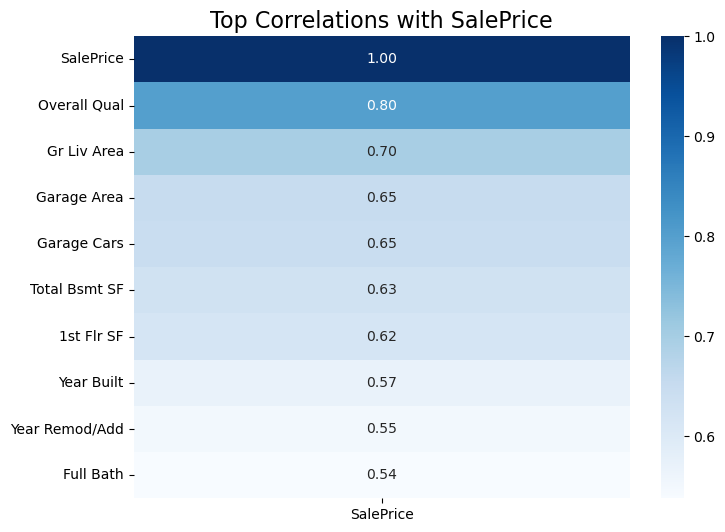

In [9]:
# create heatmap of top correlations
top_corr = np.abs(ames_train.corr()[['SalePrice']]).sort_values('SalePrice', ascending=False)
plt.figure(figsize=(8, 6))
sns.heatmap(top_corr.head(10), cmap='Blues', annot=True, fmt=".2f", cbar=True)
plt.title('Top Correlations with SalePrice', fontsize=16)  # Add a title
plt.show()

In [10]:
features_num = list(ames_train._get_numeric_data().drop(['MS SubClass', 'Mo Sold', 'Yr Sold', 'SalePrice'], axis=1))
features_cat = [x for x in ames_train.columns if (x not in features_num) and (x != 'SalePrice')]

In [11]:
# Add 'TotalSF' to both dataframes
def add_totalSF(df):
    df['TotalSF'] = df['Total Bsmt SF'] + df['1st Flr SF'] + df['2nd Flr SF']

add_totalSF(ames_train)
add_totalSF(kaggle_test)

#Append 'TotalSF' to the features_num list
features_num.append('TotalSF')

#Remove original features from features_num to avoid collinearity
features_to_remove = ['Total Bsmt SF', '1st Flr SF', '2nd Flr SF']
features_num = [x for x in features_num if x not in features_to_remove]

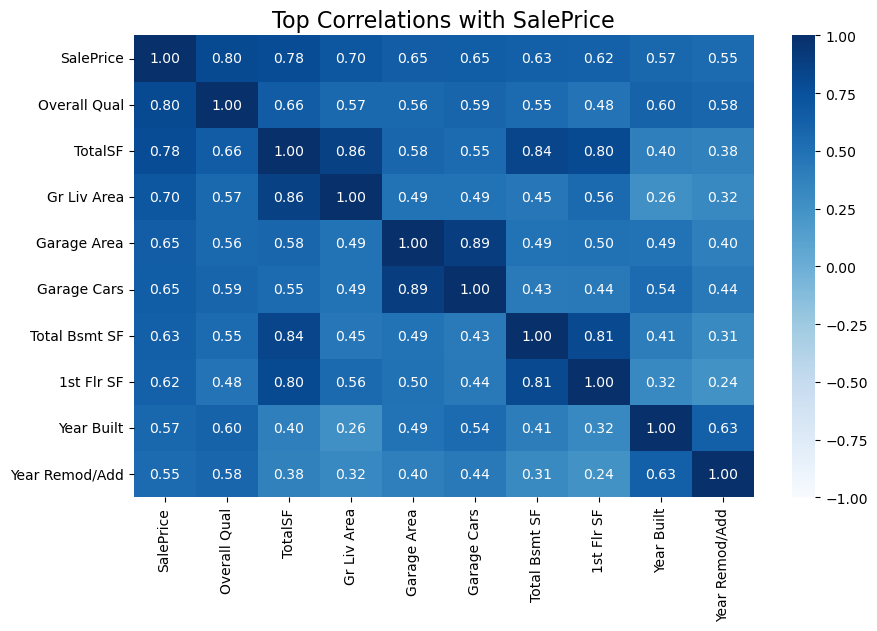

In [12]:
# Calculate the top correlations with SalePrice
top_corr = np.abs(ames_train.corr()['SalePrice']).sort_values(ascending=False)
top_corr_features = top_corr.index[:10]  # Select the top 10 features with the highest absolute correlation

# Create a correlation matrix for the top features
top_corr_matrix = ames_train[top_corr_features].corr()

# Create a heatmap with annotations
plt.figure(figsize=(10, 6))
sns.heatmap(top_corr_matrix, annot=True, fmt=".2f", cmap='Blues', vmin=-1, vmax=1)
plt.title("Top Correlations with SalePrice", fontsize=16)
plt.show()

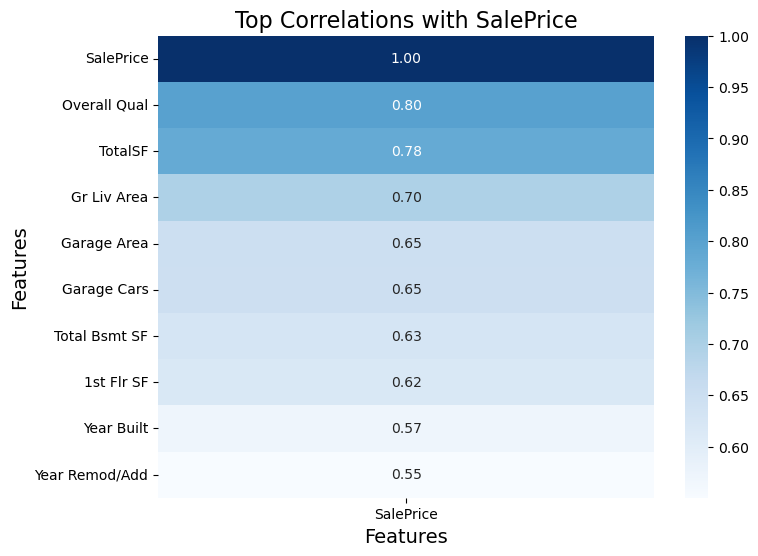

In [13]:
# create heatmap of top correlations
top_corr = np.abs(ames_train.corr()[['SalePrice']]).sort_values('SalePrice', ascending=False)

plt.figure(figsize=(8, 6))
ax = sns.heatmap(top_corr.head(10), cmap='Blues', annot=True, fmt=".2f", cbar=True)
plt.title('Top Correlations with SalePrice', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.xticks()
plt.show()

In [14]:
ames_train.shape

(2051, 75)

In [15]:
ames_train = pd.get_dummies(ames_train, columns=features_cat, drop_first=True) 

In [16]:
ames_train.shape

(2051, 261)

In [17]:
features_model = [x for x in ames_train.columns if x != 'SalePrice']

In [18]:
kaggle_test.shape

(878, 74)

In [19]:
kaggle_test = pd.get_dummies(kaggle_test, columns=features_cat, drop_first=True) 

In [20]:
kaggle_test.shape

(878, 250)

In [21]:
ames_train[features_model].shape

(2051, 260)

In [22]:
missing_cols = set(ames_train.columns) - set(kaggle_test.columns)
# Add a missing column in test with default value equal to 0
for c in missing_cols:
    kaggle_test[c] = 0
# Ensure the order of columns in test is the same as in train
kaggle_test = kaggle_test[features_model]

In [23]:
kaggle_test.shape

(878, 260)

In [24]:
ames_train.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,TotalSF,MS SubClass_30,MS SubClass_40,...,Garage Type_CarPort,Garage Type_Detchd,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Mo Sold_2,Mo Sold_3,Mo Sold_4,Mo Sold_5,Mo Sold_6,Mo Sold_7,Mo Sold_8,Mo Sold_9,Mo Sold_10,Mo Sold_11,Mo Sold_12,Yr Sold_2007,Yr Sold_2008,Yr Sold_2009,Yr Sold_2010,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,0.0,13517,6,8,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,0,44,0,0,0,0,0,130500,2204.0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,43.0,11492,7,5,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,74,0,0,0,0,0,220000,3035.0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,68.0,7922,5,7,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,246.0,0,52,0,0,0,0,0,109000,2114.0,0,0,...,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,73.0,9802,5,5,2006,2007,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,0.0,0.0,2,1,3,1,7,0,2007.0,2.0,400.0,100,0,0,0,0,0,0,174000,1828.0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,82.0,14235,6,8,1900,1993,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,0.0,0.0,2,0,3,1,6,0,1957.0,2.0,484.0,0,59,0,0,0,0,0,138500,2121.0,0,0,...,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


# Model

In [25]:
features_model = [x for x in ames_train.columns if x != 'SalePrice']
X = ames_train[features_model]
y = ames_train['SalePrice']

# Split the data into training and testing sets
random_state = 42
test_size = 0.05
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=random_state, test_size=test_size
)

In [26]:
# Create a Linear Regression model
lr = LinearRegression()


# Perform cross-validation on the training data
cv_scores = cross_val_score(lr, X_train, y_train, cv=3)

# Print the cross-validation scores and their mean
print("Cross-validation scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-validation scores: [0.91064417 0.81907284 0.71123203]
Mean CV Score: 0.8136496821271165


In [27]:
# Standardize X_train and X_test using Standard Scaler
ss = StandardScaler()

# Fit Standard Scaler to X_train and transform X_train
X_train_sc = ss.fit_transform(X_train)

# Transform X_test using Standard Scaler
X_test_sc = ss.transform(X_test)

# Standardize kaggle_test using Standard Scaler
ss = StandardScaler()
kaggle_test_sc = ss.fit_transform(kaggle_test)

In [41]:
lr = LinearRegression()
ridge = RidgeCV(alphas=np.linspace(1, 200, 100))
lasso = LassoCV(n_alphas=100)
enet_alphas = np.arange(0.5, 1.0, 0.005)
enet_ratio = 0.5
enet = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)

In [43]:
# Fit the LassoCV model to your data
lasso.fit(X, y)  # Replace X and y with your data

# Now you can access the coefficients
lasso_coefficients = lasso.coef_

In [45]:
ridge.fit(X_train_sc, y_train)  
ridge_coefficients = ridge.coef_

In [46]:
ridge.fit(X_train_sc, y_train)
ridge_coefficients = ridge.coef_

In [48]:
enet.fit(X_train_sc, y_train) 
enet_coefficients = enet.coef_

Text(0.5, 1.05, 'Regularization versus Standard Linear Regression')

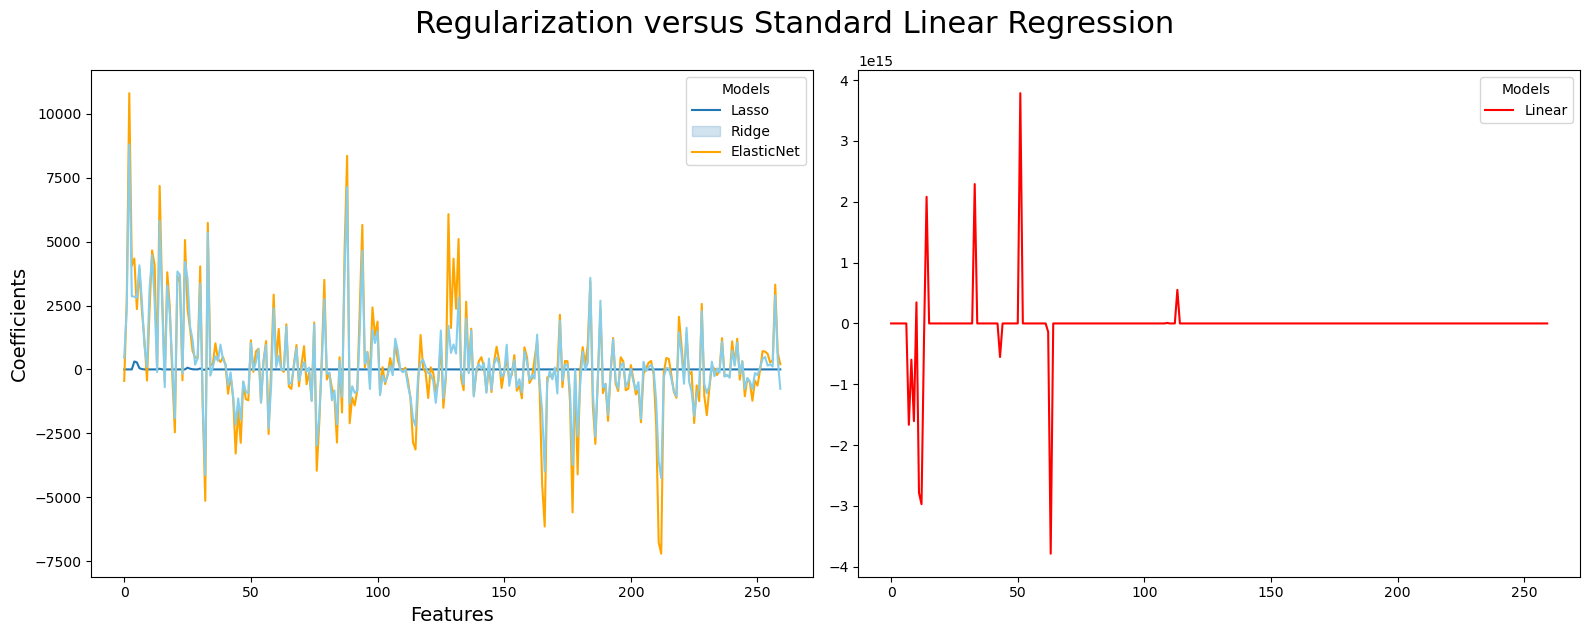

In [50]:
lr.fit(X_train_sc, y_train)
lr_coefficients = lr.coef_

# Create a 1x2 grid of subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax = ax.ravel()

# Plot the coefficients of the regularized models (Lasso, Ridge, ElasticNet)
sns.lineplot(data=lasso.coef_, ax=ax[0])
sns.lineplot(data=ridge.coef_, ax=ax[0], color='orange')
sns.lineplot(data=enet_coefficients, ax=ax[0], color='skyblue')
ax[0].set_xlabel('Features', fontsize=14)
ax[0].set_ylabel('Coefficients', fontsize=14)
ax[0].legend(title='Models', loc='upper right', labels=['Lasso', 'Ridge', 'ElasticNet'])

# Plot the coefficients of the standard linear regression model
sns.lineplot(data=lr_coefficients, ax=ax[1], color='red')
ax[1].legend(title='Models', loc='upper right', labels=['Linear'])

# Adjust subplot layout
plt.tight_layout()
plt.suptitle('Regularization versus Standard Linear Regression', fontsize=22, y=1.05)

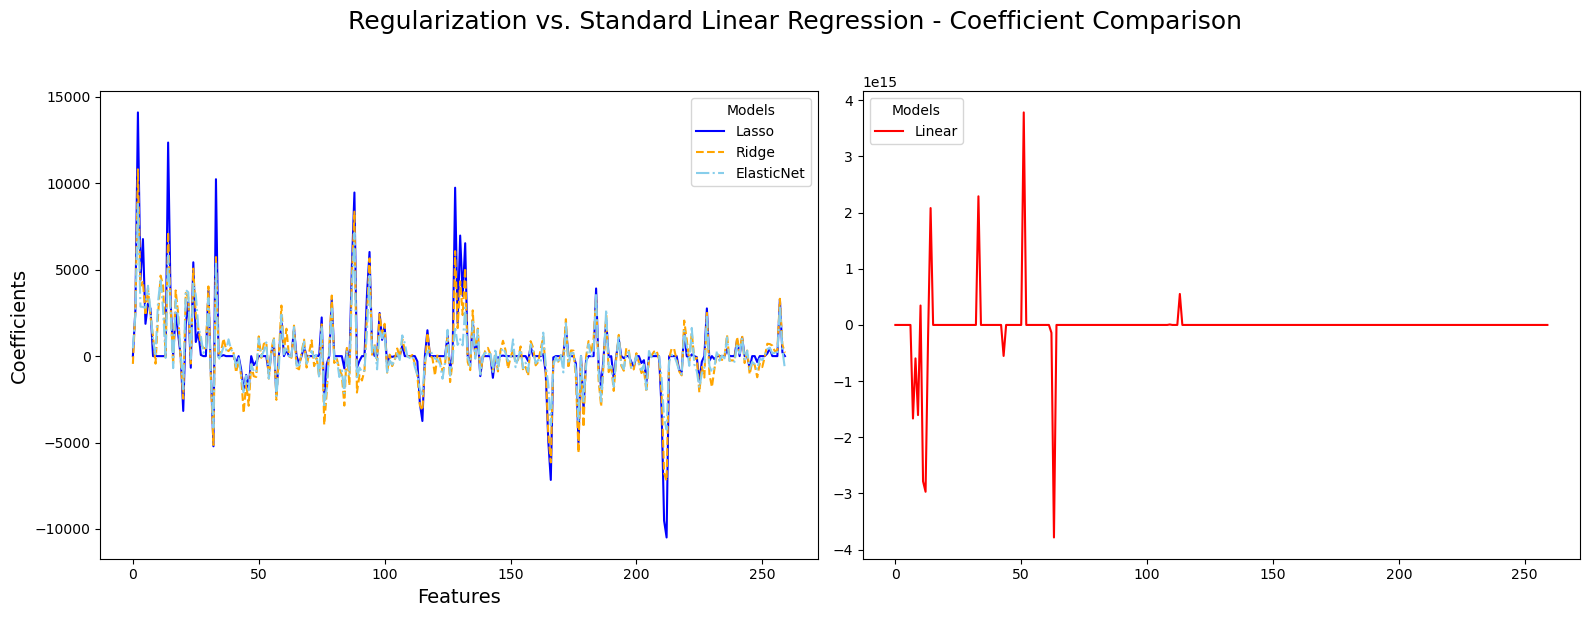

In [55]:
# Fit the Linear Regression model to your data
lr.fit(X_train_sc, y_train)
lr_coefficients = lr.coef_

# Create a 1x2 grid of subplots with better styling
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax = ax.ravel()

# Define colors and line styles for better distinction
colors = ['blue', 'orange', 'skyblue']
line_styles = ['-', '--', '-.']

# Plot the coefficients of the regularized models (Lasso, Ridge, ElasticNet)
labels = ['Lasso', 'Ridge', 'ElasticNet']
for i, coef in enumerate([lasso.coef_, ridge.coef_, enet_coefficients]):
    sns.lineplot(data=coef, ax=ax[0], color=colors[i], label=labels[i], linestyle=line_styles[i])

ax[0].set_xlabel('Features', fontsize=14)
ax[0].set_ylabel('Coefficients', fontsize=14)
ax[0].legend(title='Models', loc='upper right')

# Plot the coefficients of the standard linear regression model
sns.lineplot(data=lr_coefficients, ax=ax[1], color='red', label='Linear')
ax[1].legend(title='Models', loc='upper right')

# Set a more informative title
plt.suptitle('Regularization vs. Standard Linear Regression - Coefficient Comparison', fontsize=18, y=1.02)

# Customize the legend position for the second plot
ax[1].legend(title='Models', loc='upper left')

# Adjust subplot layout
plt.tight_layout()


# LASSO

In [52]:
# Fit LassoCV model to data
lasso.fit(X_train_sc,y_train)
ridge.fit(X_train_sc,y_train)
enet.fit(X_train_sc,y_train)
lr.fit(X_train_sc,y_train)

LinearRegression()

In [53]:
from sklearn.linear_model import LassoCV

# Create a Lasso model with cross-validated alpha selection
lasso = LassoCV()
model = lasso.fit(X_train_sc, y_train)

# Evaluate the model's performance on training and test data
train_score = lasso.score(X_train_sc, y_train)
test_score = lasso.score(X_test_sc, y_test)

print(f"R-squared (train): {train_score:.4f}")
print(f"R-squared (test): {test_score:.4f}")

# Find features with the highest coefficients from Lasso
lasso_features = pd.DataFrame({'feature': X_train.columns, 'coef': lasso.coef_})
lasso_features['abs_coef'] = np.abs(lasso_features['coef'])
lasso_features = lasso_features.sort_values(by='abs_coef', ascending=False).head(10)

print("Top 10 features with highest absolute coefficients:")
print(lasso_features)

R-squared (train): 0.9122
R-squared (test): 0.9018
Top 10 features with highest absolute coefficients:
                  feature          coef      abs_coef
2            Overall Qual  14104.271796  14104.271796
14            Gr Liv Area  12360.848383  12360.848383
212       Kitchen Qual_TA -10495.677185  10495.677185
33                TotalSF  10238.262338  10238.262338
128     Roof Matl_CompShg   9747.008139   9747.008139
211       Kitchen Qual_Gd  -9524.121997   9524.121997
88   Neighborhood_NridgHt   9468.765632   9468.765632
166         Exter Qual_TA  -7165.618237   7165.618237
130     Roof Matl_Tar&Grv   6978.061799   6978.061799
4              Year Built   6775.265402   6775.265402


In [29]:
lasso_features

,feature,coef,abs_coef
2,Overall Qual,14104.271796,14104.271796
14,Gr Liv Area,12360.848383,12360.848383
212,Kitchen Qual_TA,-10495.677185,10495.677185
33,TotalSF,10238.262338,10238.262338
128,Roof Matl_CompShg,9747.008139,9747.008139
211,Kitchen Qual_Gd,-9524.121997,9524.121997
88,Neighborhood_NridgHt,9468.765632,9468.765632
166,Exter Qual_TA,-7165.618237,7165.618237
130,Roof Matl_Tar&Grv,6978.061799,6978.061799
4,Year Built,6775.265402,6775.265402


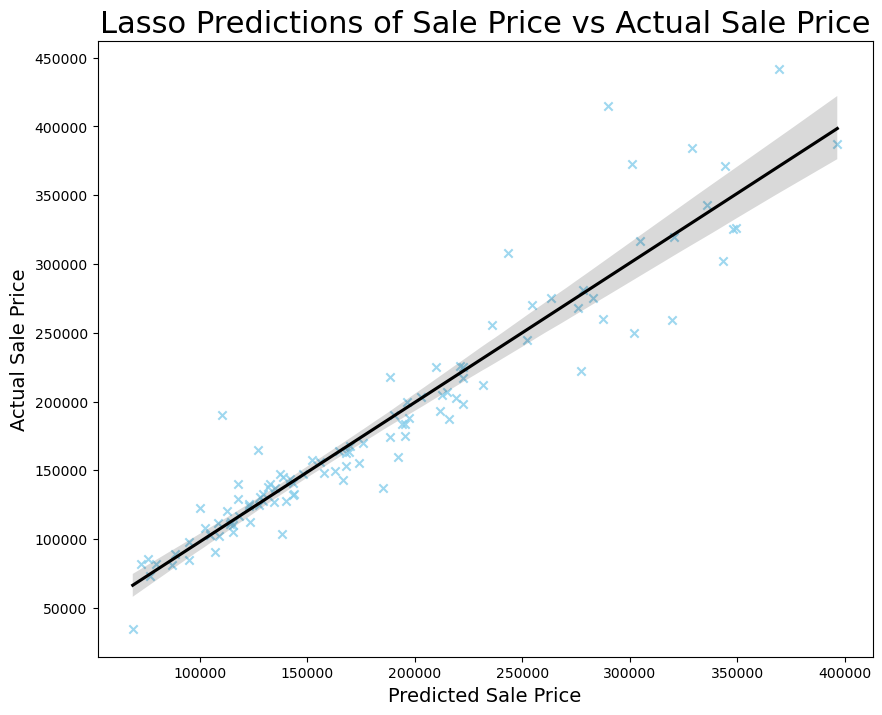

In [54]:
# Create scatterplot to show predicted values versus actual values
lasso_preds = lasso.predict(X_test_sc)

plt.figure(figsize=(10,8))
sns.regplot(data=X_train_sc, x=lasso_preds, y=y_test, marker='x', color='skyblue', line_kws={'color':'black'})
plt.xlabel('Predicted Sale Price', fontsize=14)
plt.ylabel('Actual Sale Price', fontsize=14)
plt.title('Lasso Predictions of Sale Price vs Actual Sale Price', fontsize=22);

In [31]:
y_pred = model.predict(kaggle_test_sc)
y_pred.mean()

181329.3921971253

In [32]:
y_pred.shape

(878,)

In [33]:
submission = pd.DataFrame(y_pred, columns=['SalePrice'])
submission['Id'] = test_data['Id']
submission = submission[['Id', 'SalePrice']]

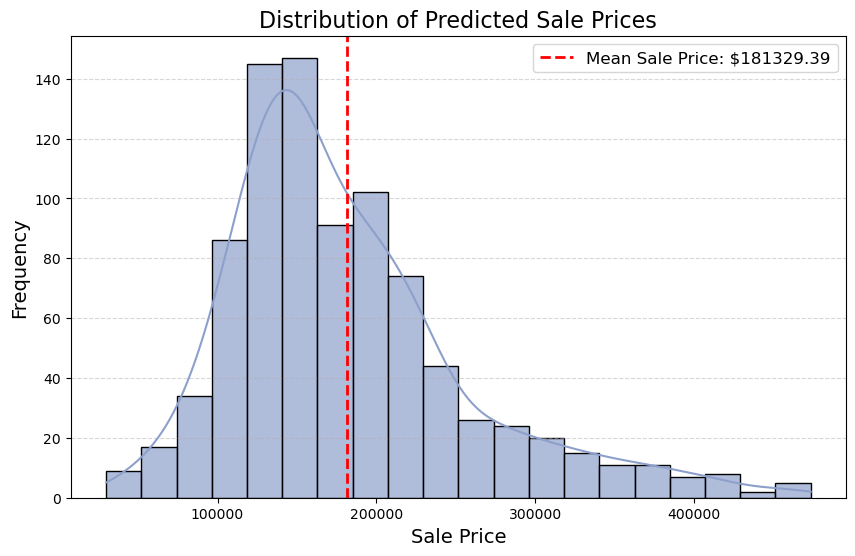

In [34]:
# Set a custom color palette
custom_palette = sns.color_palette("Set2")

plt.figure(figsize=(10, 6))
sns.histplot(submission['SalePrice'], bins=20, kde=True, color=custom_palette[2], alpha=0.7)
plt.title('Distribution of Predicted Sale Prices', fontsize=16)
plt.xlabel('Sale Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add a vertical line for the mean value
mean_sale_price = submission['SalePrice'].mean()
plt.axvline(mean_sale_price, color='red', linestyle='--', label=f'Mean Sale Price: ${mean_sale_price:.2f}', linewidth=2)
plt.legend(fontsize=12)

# Customize grid lines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Save the figure as a PNG file
plt.savefig('predicted_sale_prices_histogram.png', dpi=300, bbox_inches='tight')

plt.show()

In [35]:
submission.to_csv('MY_submission.csv', index=False)